In [16]:
import os
import pandas as pd
from glob import glob

folder = r"C:\Users\shang\OneDrive\Documents\3IA\DW\prjt\dims"

xlsx_files = glob(os.path.join(folder, "*.xlsx"))
print("Excel files found:", xlsx_files)

# Load into a dictionary
dataframes = {os.path.basename(f): pd.read_excel(f) for f in xlsx_files}

# Preview names of loaded files
list(dataframes.keys())


Excel files found: ['C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\Colors.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\Customers_f.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\customers_locations.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\is_recommanded.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\Locations.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\Orders.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\Payment_methods.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\Pricing_strategies.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\Products_f.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\product_ml.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\Product_qualities.xlsx', 'C:\\Users\\shang\\OneDrive\\Documents\\3IA\\DW\\prjt\\dims\\region_ml.xlsx', 'C:\\Use

['Colors.xlsx',
 'Customers_f.xlsx',
 'customers_locations.xlsx',
 'is_recommanded.xlsx',
 'Locations.xlsx',
 'Orders.xlsx',
 'Payment_methods.xlsx',
 'Pricing_strategies.xlsx',
 'Products_f.xlsx',
 'product_ml.xlsx',
 'Product_qualities.xlsx',
 'region_ml.xlsx',
 'region_stats.xlsx',
 'Reviews.xlsx',
 'Sales.xlsx',
 'Sections.xlsx',
 'Shipping_types.xlsx']

In [17]:
import pandas as pd

customers = dataframes["customers_locations.xlsx"]
customers.head()


,code_customer,Age,Gender,zip_code,Preferred_size,Overall_review,Subscription Status,Previous Purchases,Payment Method,Frequency of Purchases,state,city
0,1,55,Male,Lexington_Kentucky,L,3.1,Yes,14,Venmo,Fortnightly,Kentucky,Lexington
1,2,19,Male,Auburn_Maine,L,3.1,Yes,2,Cash,Fortnightly,Maine,Auburn
2,3,50,Male,Springfield_Massachusetts,S,3.1,Yes,23,Credit Card,Weekly,Massachusetts,Springfield
3,4,21,Male,Cranston_Rhode Island,M,3.5,Yes,49,PayPal,Weekly,Rhode Island,Cranston
4,5,45,Male,Eugene_Oregon,M,2.7,Yes,31,PayPal,Annually,Oregon,Eugene


In [18]:
import pandas as pd

# Standardize column names
customers.columns = (
    customers.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Keep only useful columns AND make a copy to avoid warnings
keep_cols = [
    "age",
    "gender",
    "preferred_size",
    "overall_review",
    "subscription_status",
    "previous_purchases",
    "payment_method",
    "frequency_of_purchases",
    "state",
    "city"
]

customers = customers[keep_cols].copy()   # <-- FIX HERE

customers.head()


,age,gender,preferred_size,overall_review,subscription_status,previous_purchases,payment_method,frequency_of_purchases,state,city
0,55,Male,L,3.1,Yes,14,Venmo,Fortnightly,Kentucky,Lexington
1,19,Male,L,3.1,Yes,2,Cash,Fortnightly,Maine,Auburn
2,50,Male,S,3.1,Yes,23,Credit Card,Weekly,Massachusetts,Springfield
3,21,Male,M,3.5,Yes,49,PayPal,Weekly,Rhode Island,Cranston
4,45,Male,M,2.7,Yes,31,PayPal,Annually,Oregon,Eugene


In [19]:
import pandas as pd

customers.info()
print("\nMissing values per column:\n")
print(customers.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     3900 non-null   int64  
 1   gender                  3900 non-null   object 
 2   preferred_size          3900 non-null   object 
 3   overall_review          3900 non-null   float64
 4   subscription_status     3900 non-null   object 
 5   previous_purchases      3900 non-null   int64  
 6   payment_method          3900 non-null   object 
 7   frequency_of_purchases  3900 non-null   object 
 8   state                   3900 non-null   object 
 9   city                    3900 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 304.8+ KB

Missing values per column:

age                       0
gender                    0
preferred_size            0
overall_review            0
subscription_status       0
previous_purchases      

In [20]:
import pandas as pd

categorical_cols = [
    "gender",
    "preferred_size",
    "subscription_status",
    "payment_method",
    "frequency_of_purchases",
    "state",
    "city"
]

for col in categorical_cols:
    customers[col] = customers[col].astype("category")

customers.head()


,age,gender,preferred_size,overall_review,subscription_status,previous_purchases,payment_method,frequency_of_purchases,state,city
0,55,Male,L,3.1,Yes,14,Venmo,Fortnightly,Kentucky,Lexington
1,19,Male,L,3.1,Yes,2,Cash,Fortnightly,Maine,Auburn
2,50,Male,S,3.1,Yes,23,Credit Card,Weekly,Massachusetts,Springfield
3,21,Male,M,3.5,Yes,49,PayPal,Weekly,Rhode Island,Cranston
4,45,Male,M,2.7,Yes,31,PayPal,Annually,Oregon,Eugene


In [21]:
# Yes = 1, No = 0
customers["subscription_status"] = customers["subscription_status"].map({"Yes": 1, "No": 0})


In [22]:
freq_map = {
    "Annually": 1,
    "Quarterly": 2,
    "Bi-Weekly": 3,
    "Fortnightly": 4,
    "Weekly": 5
}

customers["frequency_of_purchases"] = customers["frequency_of_purchases"].map(freq_map)


In [23]:
import pandas as pd

# Make sure numeric columns are numeric
numeric_cols = ["age", "overall_review", "previous_purchases", "frequency_of_purchases", "subscription_status"]

for col in numeric_cols:
    customers[col] = pd.to_numeric(customers[col], errors="coerce")  # convert any lingering categorical/text to numeric

# Optional: check dtypes
customers[numeric_cols].dtypes


age                         int64
overall_review            float64
previous_purchases          int64
frequency_of_purchases    float64
subscription_status         int64
dtype: object

In [24]:
import numpy as np

region_data = customers.groupby("city").agg({
    "age": "mean",
    "overall_review": "mean",
    "previous_purchases": "mean",
    "frequency_of_purchases": "mean",
    "subscription_status": "mean",               # % subscribed
    "gender": lambda x: (x == "Female").mean()   # % female
}).reset_index()

region_data.head()


C:\Users\shang\AppData\Local\Temp\ipykernel_21460\2240292949.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_data = customers.groupby("city").agg({


,city,age,overall_review,previous_purchases,frequency_of_purchases,subscription_status,gender
0,Aberdeen,43.083333,3.483333,22.333333,2.111111,0.250000,0.333333
1,Akron,41.000000,4.156250,25.187500,3.000000,0.312500,0.312500
2,Albany,49.307692,3.692308,22.076923,2.600000,0.153846,0.307692
3,Albuquerque,37.666667,3.526667,22.400000,3.000000,0.333333,0.400000
4,Alexandria,38.444444,3.677778,20.888889,3.500000,0.277778,0.388889


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numeric columns (exclude 'city' which is an identifier)
numeric_cols = ["age", "overall_review", "previous_purchases", 
                "frequency_of_purchases", "subscription_status", "gender"]

scaler = StandardScaler()

region_data_scaled = region_data.copy()
region_data_scaled[numeric_cols] = scaler.fit_transform(region_data[numeric_cols])

region_data_scaled.head()


,city,age,overall_review,previous_purchases,frequency_of_purchases,subscription_status,gender
0,Aberdeen,-0.220533,-1.589062,-0.823924,-1.928178,-0.195641,0.129146
1,Akron,-0.783423,2.435427,-0.060316,0.058899,0.365860,-0.049397
2,Albany,1.461211,-0.339256,-0.892525,-0.835286,-1.059490,-0.090599
3,Albuquerque,-1.684048,-1.329900,-0.806088,0.058899,0.553028,0.700483
4,Alexandria,-1.473902,-0.426155,-1.210373,1.176629,0.053915,0.605260


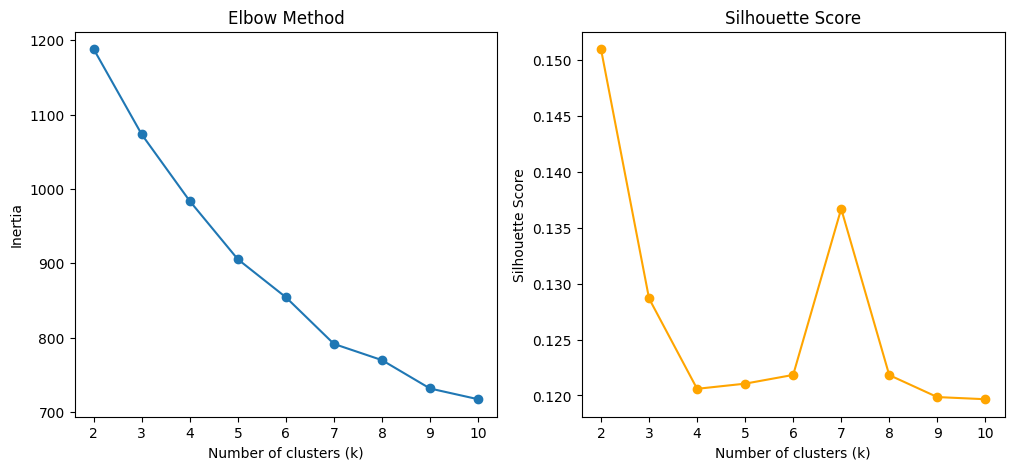

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = region_data_scaled[numeric_cols]

inertia = []
silhouette = []
K_range = range(2, 11)  # try 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, labels))

# Plot elbow
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# Plot silhouette
plt.subplot(1,2,2)
plt.plot(K_range, silhouette, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.show()

In [27]:
from sklearn.cluster import KMeans

optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
region_data_scaled['cluster'] = kmeans.fit_predict(X)

region_data_scaled.head()


,city,age,overall_review,previous_purchases,frequency_of_purchases,subscription_status,gender,cluster
0,Aberdeen,-0.220533,-1.589062,-0.823924,-1.928178,-0.195641,0.129146,4
1,Akron,-0.783423,2.435427,-0.060316,0.058899,0.365860,-0.049397,3
2,Albany,1.461211,-0.339256,-0.892525,-0.835286,-1.059490,-0.090599,4
3,Albuquerque,-1.684048,-1.329900,-0.806088,0.058899,0.553028,0.700483,2
4,Alexandria,-1.473902,-0.426155,-1.210373,1.176629,0.053915,0.605260,2


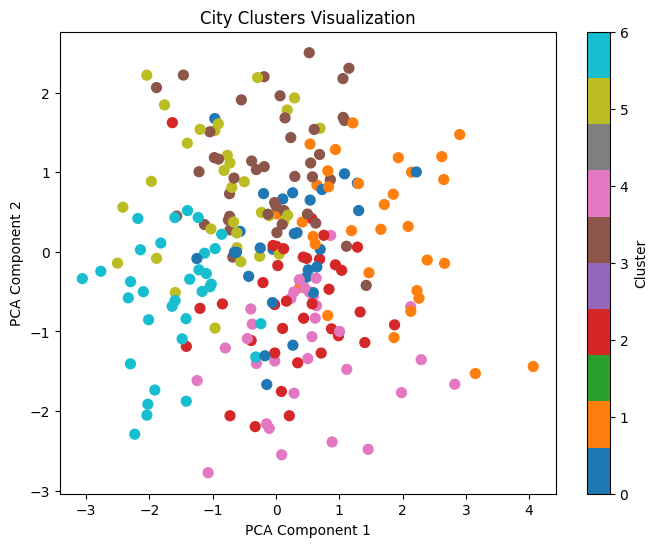

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=region_data_scaled['cluster'], cmap='tab10', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("City Clusters Visualization")
plt.colorbar(label='Cluster')
plt.show()


In [29]:
import pandas as pd

# Add city names back to clusters
cluster_summary = region_data_scaled[['city', 'cluster']].copy()

# Add original (unscaled) features for better interpretation
for col in numeric_cols:
    cluster_summary[col] = region_data[col].values

# Group by cluster to see characteristics
cluster_profiles = cluster_summary.groupby('cluster').agg({
    'age': 'mean',
    'overall_review': 'mean',
    'previous_purchases': 'mean',
    'frequency_of_purchases': 'mean',
    'subscription_status': 'mean',
    'gender': 'mean'
}).round(2)

print("Cluster Profiles (Original Scale):")
print(cluster_profiles)

print("\nCities in Each Cluster:")
for cluster in sorted(region_data_scaled['cluster'].unique()):
    cities = cluster_summary[cluster_summary['cluster'] == cluster]['city'].tolist()
    print(f"Cluster {cluster}: {', '.join(cities)}")


Cluster Profiles (Original Scale):
           age  overall_review  previous_purchases  frequency_of_purchases  \
cluster                                                                      
0        48.98            3.77               23.25                    3.11   
1        41.16            3.80               26.00                    3.10   
2        41.48            3.58               23.38                    3.11   
3        43.02            3.95               24.89                    3.18   
4        44.62            3.70               23.89                    2.35   
5        46.51            3.71               30.75                    3.13   
6        42.80            3.68               25.87                    2.79   

         subscription_status  gender  
cluster                               
0                       0.27    0.34  
1                       0.17    0.48  
2                       0.25    0.32  
3                       0.27    0.25  
4                       0.22

## Regional Cluster Interpretations

**Cluster 0 - Mature Market Regions:**
Regions in Cluster 0 are characterized by an older demographic base (avg age 49) with the highest subscription adoption rate (27%). These cities show moderate purchase engagement with 23.25 previous purchases and a frequency of 3.11. With 34% female customer base, these regions represent established, mature markets with strong subscription loyalty.

**Cluster 1 - High-Activity, Transactional Markets:**
The youngest regions (avg age 41) with the highest purchase volume (26.00), but paradoxically the lowest subscription adoption (17%). These cities have nearly gender-balanced markets (48% female) and moderate purchase frequency (3.10). These regions favor transactional, one-time purchase behaviors over subscription models.

**Cluster 2 - Average Engagement Markets:**
Cities in Cluster 2 represent mid-aged markets (41.48 years) with relatively lower satisfaction scores (3.58) and moderate purchase history (23.38). With lower female market presence (32%) and moderate subscription rate (25%), these regions show average performance across all metrics—neither particularly strong nor weak.

**Cluster 3 - High-Satisfaction, Male-Dominated Markets:**
These regions stand out with the highest overall satisfaction scores (3.95), indicating highly satisfied customer bases. At age 43 with moderate purchases (24.89) and good frequency (3.18), they show balanced market engagement. However, these areas have the lowest female representation (25%), suggesting predominantly male-oriented markets.

**Cluster 4 - Infrequent Purchase Regions:**
Markets in Cluster 4 are characterized by mid-aged populations (44.62 years) with the lowest purchase frequency (2.35), despite having decent purchase history (23.89). With moderate subscription rate (22%) and 36% female representation, these regions show lower shopping engagement compared to other markets.

**Cluster 5 - Premium, High-Value Markets:**
These are premium regions with the highest purchase volumes (30.75) and an older demographic base (46.51 years). While subscription adoption is moderate (26%) and satisfaction average (3.71), their purchase volume indicates these are the most valuable long-term markets. The low female representation (26%) suggests these are predominantly male-oriented high-value regions.

**Cluster 6 - Subscription-Oriented Markets:**
Regions in Cluster 6 are uniquely characterized by the highest subscription adoption rate (45%) despite having the lowest purchase volumes (25.87). This suggests newly subscription-converted or highly subscription-oriented markets with moderate age (42.80) and the lowest female representation (23%). These cities strongly prefer subscription models over transactional purchases.

## Regional Cluster Summary Table

| Cluster | Region Type | Key Regional Characteristics | Best Marketing Strategy |
|---------|------|-----------|----------|
| 0 | Mature Markets | Oldest demographics (49), highest subscription adoption (27%), moderate purchases | Retention & loyalty programs |
| 1 | High-Activity Markets | Youngest demographics (41), highest purchases (26), low subscription adoption (17%) | One-time deals & subscription conversion campaigns |
| 2 | Average Performance Markets | Mid-age (41), lower satisfaction (3.58), average engagement | Standard regional marketing campaigns |
| 3 | Premium Satisfaction Markets | Mid-age (43), highest satisfaction (3.95), male-dominated (75%) | Premium product launches & referral programs |
| 4 | Low-Frequency Markets | Mid-age (45), lowest purchase frequency (2.35), decent history | Market re-engagement campaigns |
| 5 | High-Value Markets | Older demographics (47), highest purchases (31), male-dominated (74%) | Exclusive programs & VIP market initiatives |
| 6 | Subscription Markets | Mid-age (43), highest subscription adoption (45%), lowest purchases (26) | Subscription tier expansion & upgrades |

**Quick Regional Insights:**
- **Clusters 3 & 5** represent your strongest performing markets (highest satisfaction & purchase volumes)
- **Cluster 1** markets have the most growth potential (young, active, but low subscription adoption)
- **Cluster 4** regions need attention (lowest engagement - target with re-engagement offers)
- **Cluster 6** markets are subscription leaders (highest adoption rate - focus on retention)

## DBSCAN Clustering Analysis

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that:
- Does NOT require specifying the number of clusters upfront
- Can identify noise points (outliers) and label them as -1
- Works well with arbitrary cluster shapes
- Key parameters: `eps` (neighborhood radius) and `min_samples` (minimum points in neighborhood)


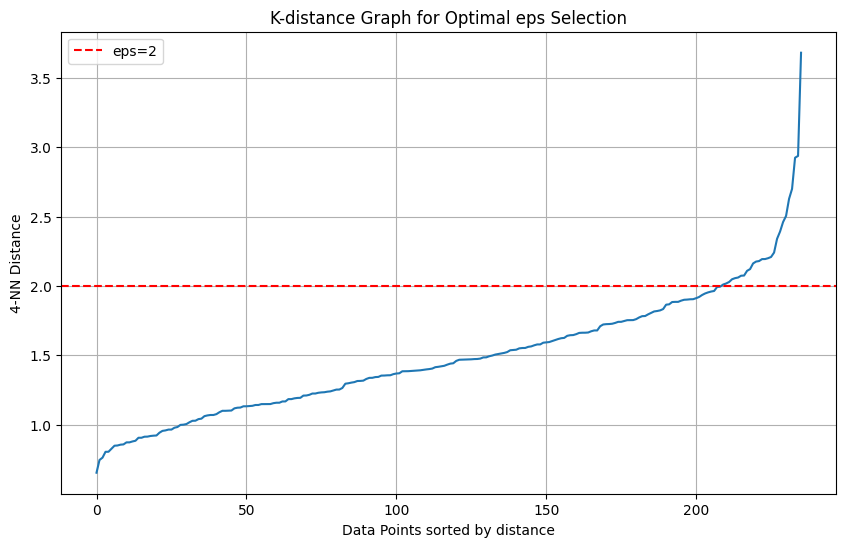

Distance statistics:
Min: 0.654, Max: 3.681
Mean: 1.488, Median: 1.437


In [30]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Find optimal eps using k-distance graph
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances
distances = np.sort(distances[:, -1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.ylabel('4-NN Distance')
plt.xlabel('Data Points sorted by distance')
plt.title('K-distance Graph for Optimal eps Selection')
plt.axhline(y=2, color='r', linestyle='--', label='eps=2')
plt.legend()
plt.grid()
plt.show()

print("Distance statistics:")
print(f"Min: {distances.min():.3f}, Max: {distances.max():.3f}")
print(f"Mean: {distances.mean():.3f}, Median: {np.median(distances):.3f}")


In [31]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with optimal parameters
eps = 1.0  # Adjust based on the k-distance graph
min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X)

# Add DBSCAN results to dataframe
region_data_scaled['dbscan_cluster'] = dbscan_labels

# Count clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"\nCluster distribution:")
print(pd.Series(dbscan_labels).value_counts().sort_index())


Number of clusters: 4
Number of noise points: 191

Cluster distribution:
-1    191
 0     25
 1      4
 2     12
 3      4
Name: count, dtype: int64


C:\Users\shang\AppData\Local\Temp\ipykernel_21460\3539207380.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker, s=size,


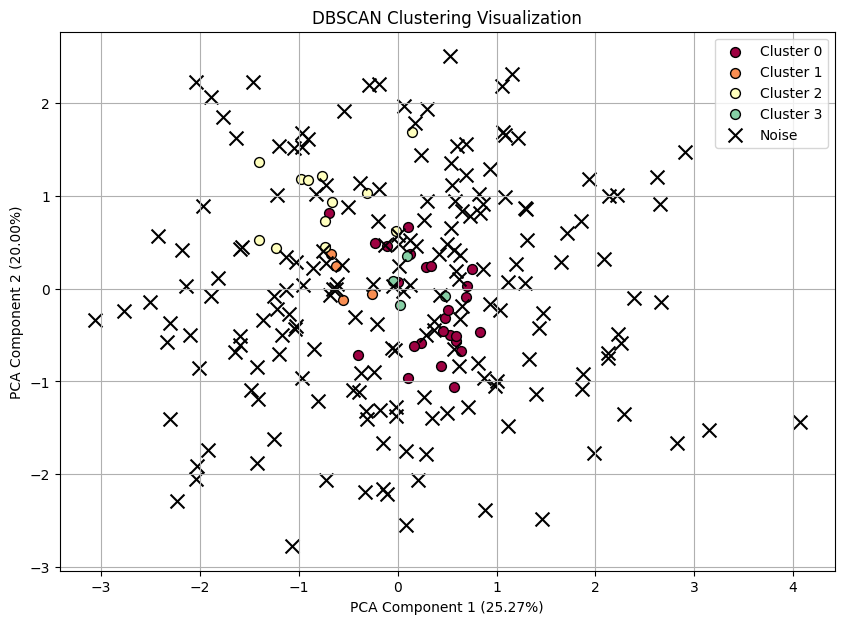

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualize DBSCAN clusters with PCA
pca_dbscan = PCA(n_components=2, random_state=42)
X_pca_dbscan = pca_dbscan.fit_transform(X)

plt.figure(figsize=(10, 7))

# Plot clusters
unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points in black
        color = 'black'
        marker = 'x'
        size = 100
    else:
        marker = 'o'
        size = 50
    
    class_member_mask = (dbscan_labels == label)
    xy = X_pca_dbscan[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker, s=size, 
                label=f'Cluster {label}' if label != -1 else 'Noise', edgecolors='k')

plt.xlabel(f'PCA Component 1 ({pca_dbscan.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PCA Component 2 ({pca_dbscan.explained_variance_ratio_[1]:.2%})')
plt.title('DBSCAN Clustering Visualization')
plt.legend()
plt.grid()
plt.show()


In [33]:
import pandas as pd

# Analyze DBSCAN clusters
dbscan_summary = region_data_scaled[['city', 'dbscan_cluster']].copy()

# Add original features
for col in numeric_cols:
    dbscan_summary[col] = region_data[col].values

# Cluster profiles
dbscan_profiles = dbscan_summary.groupby('dbscan_cluster').agg({
    'age': 'mean',
    'overall_review': 'mean',
    'previous_purchases': 'mean',
    'frequency_of_purchases': 'mean',
    'subscription_status': 'mean',
    'gender': 'mean'
}).round(2)

print("DBSCAN Cluster Profiles:")
print(dbscan_profiles)

print("\n\nCities in Each DBSCAN Cluster:")
for cluster in sorted(region_data_scaled['dbscan_cluster'].unique()):
    cities = dbscan_summary[dbscan_summary['dbscan_cluster'] == cluster]['city'].tolist()
    cluster_name = f'Cluster {cluster}' if cluster != -1 else 'NOISE'
    print(f"{cluster_name}: {', '.join(cities)}")


DBSCAN Cluster Profiles:
                  age  overall_review  previous_purchases  \
dbscan_cluster                                              
-1              43.72            3.75               25.31   
 0              45.15            3.71               25.01   
 1              46.10            3.70               28.23   
 2              44.06            3.85               27.74   
 3              41.75            3.72               22.97   

                frequency_of_purchases  subscription_status  gender  
dbscan_cluster                                                       
-1                                2.96                 0.27    0.32  
 0                                2.92                 0.23    0.34  
 1                                2.87                 0.25    0.27  
 2                                3.16                 0.31    0.24  
 3                                3.29                 0.29    0.31  


Cities in Each DBSCAN Cluster:
NOISE: Aberdeen, Akron, 